### Libraries

In [9]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar


In [36]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib


### Insert Clean Export

In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [12]:
df = pd.read_csv('data/clean-and-merged_movies.csv')

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   Date        244 non-null    object 
 2   Title_net   244 non-null    object 
 3   Title_imdb  243 non-null    object 
 4   genre       243 non-null    object 
 5   rating      243 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 11.6+ KB


In [14]:
df.genre = df.genre.str.replace(' ','')

In [15]:
df[['genre1', 'genre2', 'genre3']] = df['genre'].str.split(',', expand=True)

In [16]:
df

,Unnamed: 0,Date,Title_net,Title_imdb,genre,rating,genre1,genre2,genre3
0,0,2023-01-29,The Godfather,NaN,NaN,NaN,NaN,NaN,NaN
1,3,2023-01-29,Arrested Development,Arrested Development,Comedy,8.7,Comedy,None,None
2,7,2023-01-28,Wednesday,Wednesday,"Comedy,Crime,Fantasy",8.2,Comedy,Crime,Fantasy
3,9,2023-01-14,The Pale Blue Eye,The Pale Blue Eye,"Crime,Horror,Mystery",6.6,Crime,Horror,Mystery
4,10,2023-01-08,1899,1899,"Drama,Mystery",7.4,Drama,Mystery,None
...,...,...,...,...,...,...,...,...,...
239,809,2019-03-22,The Dirt,The Dirt,"Biography,Comedy,Drama",7.0,Biography,Comedy,Drama
240,810,2019-03-18,Triple Frontier,Triple Frontier,"Action,Thriller",6.4,Action,Thriller,None
241,816,2019-04-03,Serenity,Serenity,"Drama,Mystery,Thriller",5.4,Drama,Mystery,Thriller
242,820,2019-02-27,Velvet Buzzsaw,Velvet Buzzsaw,"Horror,Mystery,Thriller",5.7,Horror,Mystery,Thriller


### Q1: Which genre(s) am I most likely to watch on Netflix?

In [57]:
# Reshape the data frame using melt
df_genre = df.melt(id_vars=['Title_net', 'genre'], value_vars=['genre1', 'genre2', 'genre3'], var_name='Genre-order', value_name='Genre-count')

# Assign weights to categories
weights = {'genre1': 1, 'genre2': 0.5, 'genre3': 0.3}
df_genre['Weighted-counts'] = df_genre['Genre-order'].map(weights)

# Group the melted data frame by title and category
df_genres = df_genre.groupby(['Genre-count'])['Weighted-counts'].sum().reset_index()

df_genres.sample(5)

,Genre-count,Weighted-counts
6,Documentary,2.0
4,Comedy,81.8
19,Sport,0.6
17,Sci-Fi,6.1
7,Drama,85.2


In [61]:
fig = px.line_polar(df_genres, r='Weighted-counts', theta='Genre-count', line_close=True,
                    title='Which genre(s) am I most likely to watch the most on Netflix?')


In [62]:
fig.update_layout(title_x=0.5)
fig.show()

In [109]:
plt.savefig('images/genre_graph.png')

<Figure size 640x480 with 0 Axes>

### Q2: Which months I have Netflix & Chilled the most recently?

In [63]:
#months
df['Month'] = pd.DatetimeIndex(df['Date']).month
df

,Unnamed: 0,Date,Title_net,Title_imdb,genre,rating,genre1,genre2,genre3,Month
0,0,2023-01-29,The Godfather,NaN,NaN,NaN,NaN,NaN,NaN,1
1,3,2023-01-29,Arrested Development,Arrested Development,Comedy,8.7,Comedy,None,None,1
2,7,2023-01-28,Wednesday,Wednesday,"Comedy,Crime,Fantasy",8.2,Comedy,Crime,Fantasy,1
3,9,2023-01-14,The Pale Blue Eye,The Pale Blue Eye,"Crime,Horror,Mystery",6.6,Crime,Horror,Mystery,1
4,10,2023-01-08,1899,1899,"Drama,Mystery",7.4,Drama,Mystery,None,1
...,...,...,...,...,...,...,...,...,...,...
239,809,2019-03-22,The Dirt,The Dirt,"Biography,Comedy,Drama",7.0,Biography,Comedy,Drama,3
240,810,2019-03-18,Triple Frontier,Triple Frontier,"Action,Thriller",6.4,Action,Thriller,None,3
241,816,2019-04-03,Serenity,Serenity,"Drama,Mystery,Thriller",5.4,Drama,Mystery,Thriller,4
242,820,2019-02-27,Velvet Buzzsaw,Velvet Buzzsaw,"Horror,Mystery,Thriller",5.7,Horror,Mystery,Thriller,2


In [64]:
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [22]:
#transform counts in dataframe
df_seasons = df['Month'].value_counts()
df_seasons = pd.DataFrame(df_seasons)
df_seasons = df_seasons.reset_index()
df_seasons.rename(columns={'index': 'Month',
'Month': 'counts'},
inplace=True, errors='raise')

In [65]:
df_seasons

,Month,counts,Season
0,Jan,23,Winter
1,Feb,10,Winter
2,Mar,29,Spring
3,Apr,25,Spring
4,May,17,Spring
5,Jun,17,Summer
6,Jul,23,Summer
7,Aug,15,Summer
8,Sep,23,Autumn
9,Oct,13,Autumn


In [24]:
#sort by month name
month_dict = {'Jan':1,'Feb':2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
df_seasons = df_seasons.sort_values('Month', key = lambda x : x.apply (lambda x : month_dict[x]))
df_seasons.reset_index(drop=True, inplace=True)

In [25]:
df_seasons

,Month,counts
0,Jan,23
1,Feb,10
2,Mar,29
3,Apr,25
4,May,17
5,Jun,17
6,Jul,23
7,Aug,15
8,Sep,23
9,Oct,13


In [66]:
seasons = ['Winter','Winter','Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Autumn', 'Autumn', 'Autumn', 'Winter']

In [27]:
df_seasons = df_seasons.assign(Season=seasons)
df_seasons

,Month,counts,Season
0,Jan,23,Winter
1,Feb,10,Winter
2,Mar,29,Spring
3,Apr,25,Spring
4,May,17,Spring
5,Jun,17,Summer
6,Jul,23,Summer
7,Aug,15,Summer
8,Sep,23,Autumn
9,Oct,13,Autumn


In [67]:
fig = px.area(df_seasons, x='Month', y="counts", pattern_shape="Season", color="Season", line_shape='spline', pattern_shape_sequence=[".", "|", "x", "/"])
fig.show()

In [108]:
plt.savefig('images/seasons.png')

<Figure size 640x480 with 0 Axes>

### Q3: How do the seasons affect my choices?

In [97]:
#transform to list
df['genre_list'] = df['genre'].str.split(',')
df_cross = df.explode('genre_list', ignore_index = True)

In [100]:
# create a list of bars for each genre
bars = [go.Bar(x=cross_df.index, y=cross_df[col], name=col) for col in cross_df.columns]

# create the plotly layout
layout = go.Layout(barmode='stack')

# create the plotly figure
fig = go.Figure(data=bars, layout=layout)

# show the plotly figure
fig.show()

### Q4: What kind of title am I attracted to the most?

In [30]:
df.head()

,Unnamed: 0,Date,Title_net,Title_imdb,genre,rating,genre1,genre2,genre3,Month
0,0,2023-01-29,The Godfather,NaN,NaN,NaN,NaN,NaN,NaN,Jan
1,3,2023-01-29,Arrested Development,Arrested Development,Comedy,8.7,Comedy,None,None,Jan
2,7,2023-01-28,Wednesday,Wednesday,"Comedy,Crime,Fantasy",8.2,Comedy,Crime,Fantasy,Jan
3,9,2023-01-14,The Pale Blue Eye,The Pale Blue Eye,"Crime,Horror,Mystery",6.6,Crime,Horror,Mystery,Jan
4,10,2023-01-08,1899,1899,"Drama,Mystery",7.4,Drama,Mystery,None,Jan


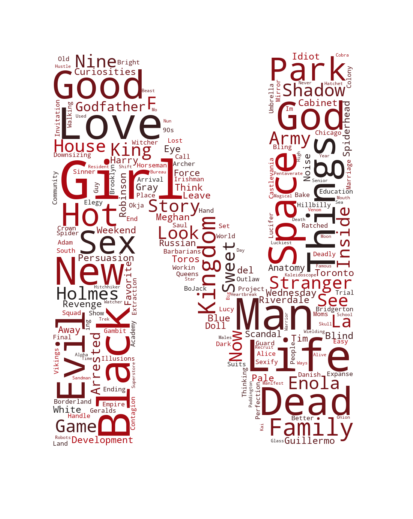

In [39]:
paintcmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])
mask = np.array(Image.open('images/Netflix_mask.png'))
text = str(list(df['Title_net'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200, colormap=paintcmap, max_words = 200, mask = mask).generate(text)


plt.figure( figsize=(5,5))

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [107]:
plt.savefig('images/wordcloud.png')

<Figure size 640x480 with 0 Axes>